## Import The Libraries

In [66]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report
sns.set()
from sklearn.svm import SVC
import time
import pandas as pd
from sklearn.svm import SVC
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential


In [2]:
"""
Take the images in the folder and read them
"""
men_dir = "/Users/asmaaaly/Downloads/Man's_Clothing/*.JPEG"
women_dir = "/Users/asmaaaly/Downloads/Woman's_Clothing/*.JPEG"

#creating a collection with the available images
men = imread_collection(men_dir)
women = imread_collection(women_dir)

print(f"Number of men clothing pictures: {len(men)}.")
print(f"Number of women clothing pictures: {len(women)}.")

Number of men clothing pictures: 1242.
Number of women clothing pictures: 1270.


/Users/asmaaaly/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Text(0, 0.5, 'Women Resized')

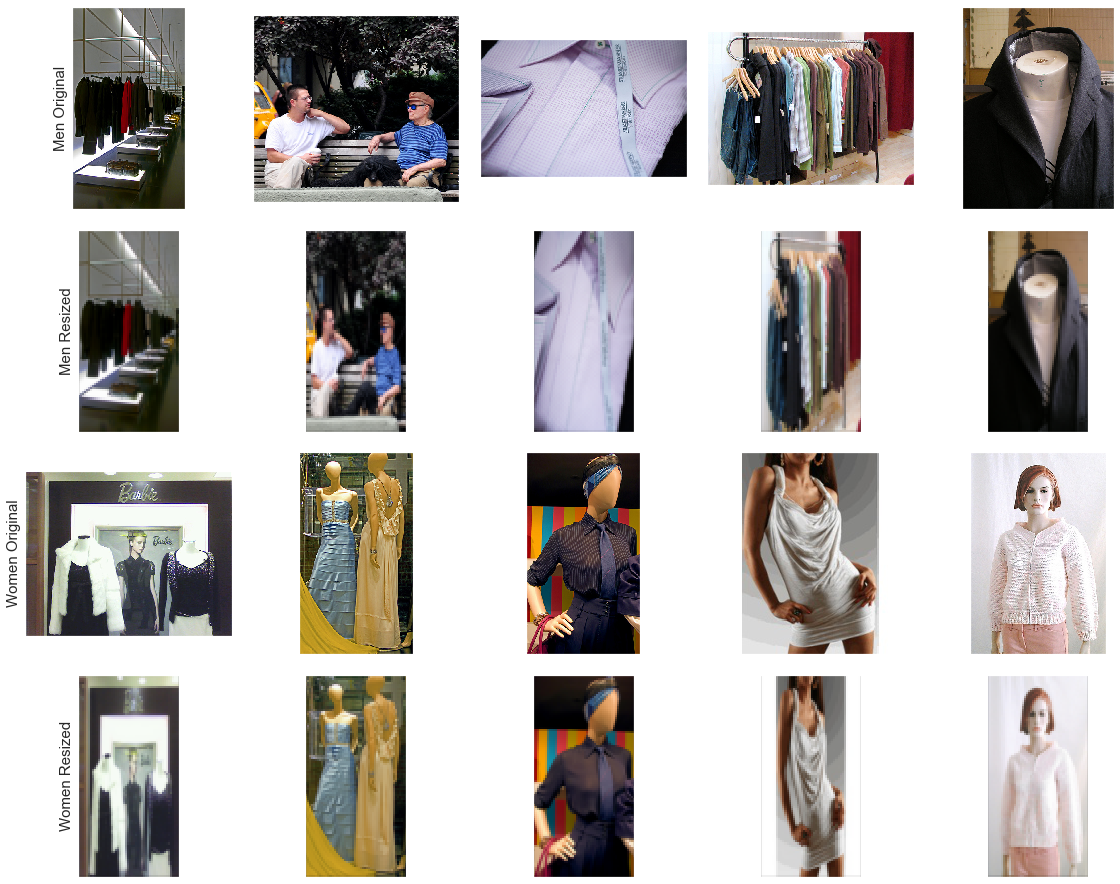

In [3]:
new_height = 100
new_width = 50
    
#resize images in dataset
men_resized = [resize(men[i],(new_height,new_width), mode='constant') for i in range(len(men))]
women_resized = [resize(women[i],(new_height,new_width), mode='constant') for i in range(len(women))]

#peak at the resized images vs original images
fig, ax = plt.subplots(4, 5, figsize=(20, 16),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(men[i])
    ax[1, i].imshow(men_resized[i])
    ax[2, i].imshow(women[i])
    ax[3, i].imshow(women_resized[i])
    
ax[0, 0].set_ylabel('Men Original',size=15)
ax[1, 0].set_ylabel('Men Resized',size=15)
ax[2, 0].set_ylabel('Women Original',size=15)
ax[3, 0].set_ylabel('Women Resized',size=15)

In [4]:
men_arr = np.array([i.flatten() for i in men_resized])
#original women array size
og_women_arr = np.array([i.flatten() for i in women_resized])

print('Original length men data:',men_arr.shape)
print('Original length women data:',og_women_arr.shape)

Original length men data: (1242, 15000)
Original length women data: (1270, 15000)


In [5]:
men_label = np.ones(len(men_arr))
og_women_label = np.zeros(len(og_women_arr))

#join the men and women clothing data together.
og_X = np.concatenate((men_arr, og_women_arr), axis=0)
og_y = np.concatenate((men_label, og_women_label), axis=0)

#split the data with 0.2 test size.
X_train,X_test,y_train,y_test = train_test_split(og_X, og_y, test_size=0.2, stratify = og_y)

print('Original length training and testing dataset shapes:')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

print("\nNumber of 0's (women clothing) and 1's (men clothing) in train and test set:")
print("Train: ",collections.Counter(y_train))
print("Test: ",collections.Counter(y_test))

Original length training and testing dataset shapes:
(2009, 15000) (2009,) (503, 15000) (503,)

Number of 0's (women clothing) and 1's (men clothing) in train and test set:
Train:  Counter({0.0: 1016, 1.0: 993})
Test:  Counter({0.0: 254, 1.0: 249})


## 1. Support Vector Machines



In [6]:
    '''
    Inputs: 
    - svc: Initialized svc instance.
    - demo: Boolean. If set to True, will print out outputs when running.
    
    Outputs: 
    - train_time: CPU processing training time (s)
    - test_time: CPU processing testing time (s)
    - train_score: Model score on the training data
    - test_score: Model score on the testing data
    '''

def train_test_svm(svc, X_train, X_test, y_train, y_test, demo = False):
    
    #train model
    train_start = time.process_time()
    
    model = svc.fit(X_train, y_train) 
    
    train_stop = time.process_time()
    
    #test model
    test_start = time.process_time()
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    test_stop = time.process_time()
    
    #get train time and test time
    train_time = train_stop - train_start
    test_time = test_stop - test_start
    
    if demo:
        print(f'Train time')
        print(f'CPU process time: {round(train_time,4)} s')

        print(f'\nTest time')
        print(f'CPU process time: {round(test_time,4)} s')

        print(f'Model score: {round(test_score,4)}')
        
    return train_time, test_time, train_score, test_score

## Report your error rates on the testing dataset for the different kernels.


In [7]:
kernels = ['linear','poly','rbf']

#create empty numpy array to store results
results = np.zeros([len(kernels),5])

#train and test SVCs with different kernels on MNIST data (2s and 7s)
for i in range(len(kernels)):
    
    #initiate the SVC classifier
    svc = SVC(kernel=kernels[i],degree=2)
    
    #get the time taken for training & testing, and the model score
    train_time, test_time, train_score, test_score = train_test_svm(svc, X_train, X_test, y_train, y_test)
    
    #store results
    results[i,:] = i, round(train_time,4), round(test_time,4), round(train_score,4), round(test_score,4)

In [8]:
df = pd.DataFrame(results, 
                  columns=['Kernels',
                           'Training CPU Processing Time (s)',
                           'Testing CPU Processing Time (s)',
                           'Training score',
                           'Testing score'])
df['Kernels'] = kernels
df

,Kernels,Training CPU Processing Time (s),Testing CPU Processing Time (s),Training score,Testing score
0,linear,79.3642,66.8355,1.0000,0.6024
1,poly,75.2314,78.2558,0.9861,0.6839
2,rbf,66.7154,81.7052,0.8552,0.6918


## Summary of the findings

This table compares the linear-kernel SVM versus non-linear SVM– poly and RBF. We can see that the linear SVM overfits the data as it has 100% training score, but is performed poorly on the test score. The poly-kernel SVM also overfits the data. The training score is 98% while the test score is 68%. The RBF outperforms both kernels with a test score of 69%.

## 2. Deep Neural Networks



### Resize the Images Again To Fit The Deep Neural Network

In [9]:
#height and width of resized image
new_height = 100
new_width = 50
    
#resize images in dataset
men_resized = [resize(men[i],(new_height,new_width), mode='constant', anti_aliasing=True, anti_aliasing_sigma=None) for i in range(len(men))]
women_resized = [resize(women[i],(new_height,new_width), mode='constant', anti_aliasing=True, anti_aliasing_sigma=None) for i in range(len(women))]

/Users/asmaaaly/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [10]:
#Reshape images to flattened array
men_arr = np.array(men_resized)
#original women array size
women_arr = np.array(women_resized)

print('Original length men data:',men_arr.shape)
print('Original length women data:',women_arr.shape)


Original length men data: (1242, 100, 50, 3)
Original length women data: (1270, 100, 50, 3)


In [11]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print(y_test.shape, y_train.shape)

(503, 1) (2009, 1)


In [12]:

#create labels for men and women data. 1 is for men, 0 is for women.
men_label = np.ones(len(men_arr))
women_label = np.zeros(len(women_arr))

#join the men and women clothing data together.
X = np.concatenate((men_arr, women_arr), axis=0)
y = np.concatenate((men_label, women_label), axis=0)

#split the data with 0.2 test size.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print('Original length training and testing dataset shapes:')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

print("\nNumber of 0's (women clothing) and 1's (men clothing) in train and test set:")
print("Train: ",collections.Counter(y_train))
print("Test: ",collections.Counter(y_test))

Original length training and testing dataset shapes:
(2009, 100, 50, 3) (2009,) (503, 100, 50, 3) (503,)

Number of 0's (women clothing) and 1's (men clothing) in train and test set:
Train:  Counter({0.0: 1016, 1.0: 993})
Test:  Counter({0.0: 254, 1.0: 249})


## Perform transfer learning using VGG16.

In [40]:
#Get back the convolutional part of a VGG network trained on ImageNet
vgg16 = VGG16(weights='imagenet',
              input_shape=(100, 50, 3),
              include_top = False)
vgg16.summary()

#freeze the lower level layers
vgg16.trainable = False

#Add the fully-connected layers 
vgg16_adapted = Sequential()
vgg16_adapted.add(vgg16)
vgg16_adapted.add(Flatten(name='flatten'))
vgg16_adapted.add(Dense(100, activation='relu', name='fc1'))
vgg16_adapted.add(Dense(32, activation='relu', name='fc2'))
vgg16_adapted.add(Dense(2, activation='softmax', name='predictions'))


#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
vgg16_adapted.summary()

#compile model
vgg16_adapted.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 50, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 50, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 50, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 12, 128)       0     

## What loss function did you choose, and why?

After doing some research, I decided to use sparse_categorical_crossentropy loss function in the Keras library for the following reasons. First, the dataset has more than two labels, women and men. These labels are expressed in integer values, 0 for men and 1 for women. Second, the last layer of the neural network is a softmax function that returns the probability distributions of a list of potential outcomes, we have two here in this case. This output suggests that using cross entropy loss function as it takes it measures the performance of a classification model whose output is a probability value between 0 and 1. The cross entropy for this particular prediction would be -log(0.8). A smaller predicted probability for the actual class label means we have a higher loss for this prediction.

In [15]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print(y_test.shape, y_train.shape, X_train.shape)

(503, 1) (2009, 1) (2009, 100, 50, 3)


In [41]:
vgg16_adapted.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  batch_size=30,
                  epochs=30,
                  verbose=1)

Train on 2009 samples, validate on 503 samples
Epoch 1/30
2009/2009 [==============================] - 107s 53ms/step - loss: 0.5935 - accuracy: 0.6675 - val_loss: 0.5394 - val_accuracy: 0.7336
Epoch 2/30
2009/2009 [==============================] - 107s 53ms/step - loss: 0.4885 - accuracy: 0.7571 - val_loss: 0.5396 - val_accuracy: 0.7197
Epoch 3/30
2009/2009 [==============================] - 98s 49ms/step - loss: 0.4569 - accuracy: 0.7755 - val_loss: 0.5043 - val_accuracy: 0.7555
Epoch 4/30
2009/2009 [==============================] - 97s 48ms/step - loss: 0.3936 - accuracy: 0.8183 - val_loss: 0.5478 - val_accuracy: 0.7356
Epoch 5/30
2009/2009 [==============================] - 96s 48ms/step - loss: 0.3482 - accuracy: 0.8427 - val_loss: 0.5488 - val_accuracy: 0.7376
Epoch 6/30
2009/2009 [==============================] - 1670s 831ms/step - loss: 0.2986 - accuracy: 0.8716 - val_loss: 0.5798 - val_accuracy: 0.7316
Epoch 7/30
2009/2009 [==============================] - 101s 50ms/step -

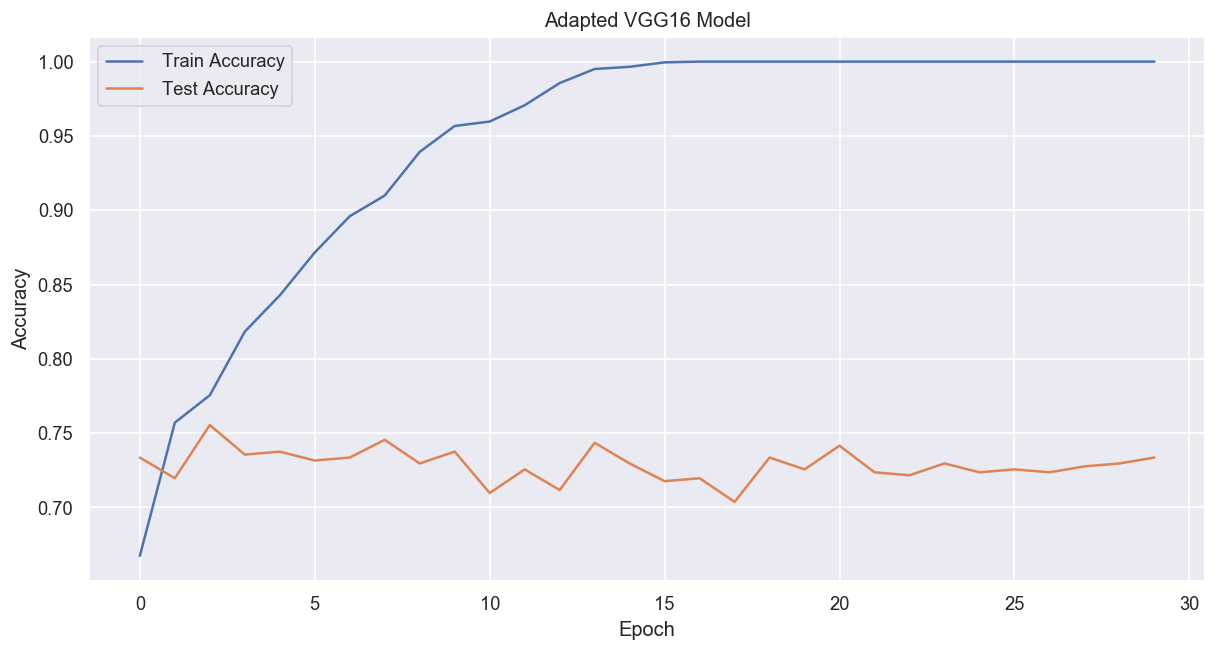

In [42]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(vgg16_adapted.history.history['accuracy'], label=' Train Accuracy')
plt.plot(vgg16_adapted.history.history['val_accuracy'],label=' Test Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Adapted VGG16 Model")
plt.legend()
plt.show()

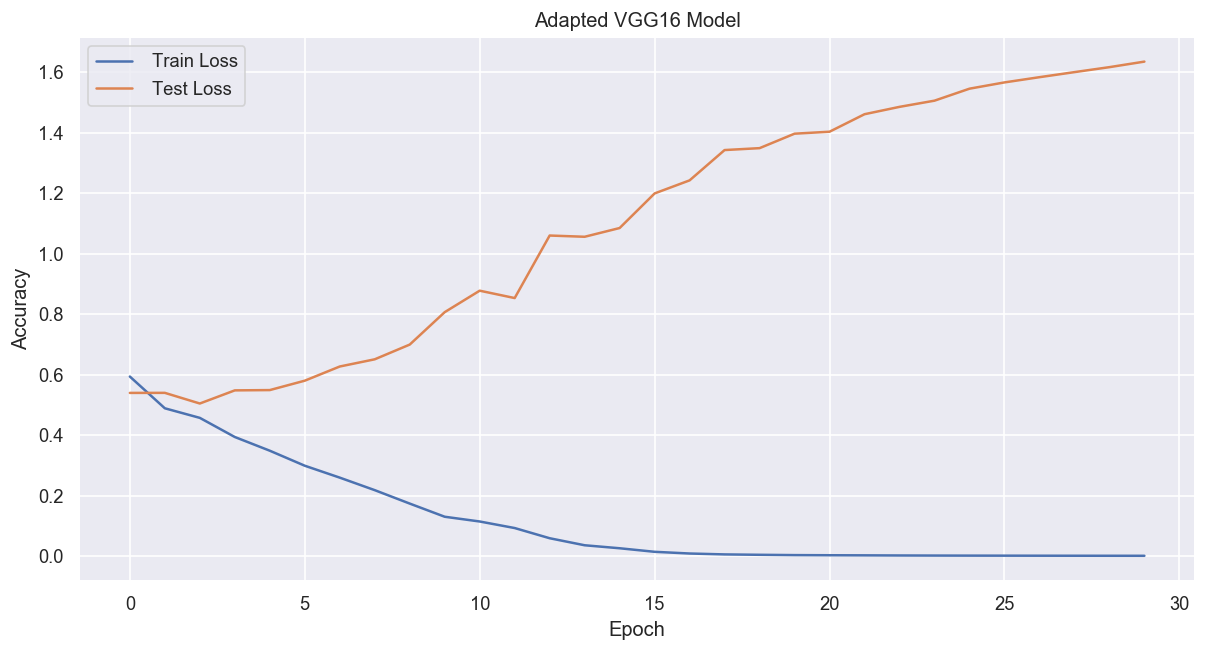

In [44]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(vgg16_adapted.history.history['loss'], label=' Train Loss')
plt.plot(vgg16_adapted.history.history['val_loss'],label=' Test Loss')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Adapted VGG16 Model")
plt.legend()
plt.show()

In [62]:
vgg16_adapted_score = vgg16_adapted.evaluate(X_test, y_test, verbose=1)

503/503 [==============================] - 20s 41ms/step


In [63]:
print("Test Score",vgg16_adapted_score[1])

Test Score 0.7335984110832214


## As we can see the Vgg16 model is overfitting as the loss in the test is higher than the training. I re-built the model by adding a dropout to minimize over-fitting. 

In [49]:
#Get back the convolutional part of a VGG network trained on ImageNet
vgg16_2 = VGG16(weights='imagenet',
              input_shape=(100, 50, 3),
              include_top = False)
vgg16_2.summary()

#freeze the lower level layers
vgg16.trainable = False

#Add the fully-connected layers 
vgg16_adapted_2 = Sequential()
vgg16_adapted_2.add(vgg16)
vgg16_adapted_2.add(Flatten(name='flatten'))
vgg16_adapted_2.add(Dense(100, activation='relu', name='fc1'))
vgg16_adapted_2.add(Dense(32, activation='relu', name='fc2'))
vgg16_adapted_2.add(Dense(2, activation='softmax', name='predictions'))
#add the dropout layer to control the overfitting
vgg16_adapted_2.add(Dropout(0.5))



#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
vgg16_adapted_2.summary()

#compile model
vgg16_adapted_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 50, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 50, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 50, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 12, 128)       0     

In [50]:
vgg16_adapted_2.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  batch_size=30,
                  epochs=30,
                  verbose=1)

Train on 2009 samples, validate on 503 samples
Epoch 1/30
2009/2009 [==============================] - 116s 58ms/step - loss: 4.0354 - accuracy: 0.5047 - val_loss: 3.1201 - val_accuracy: 0.5209
Epoch 2/30
2009/2009 [==============================] - 119s 59ms/step - loss: 3.5533 - accuracy: 0.5381 - val_loss: 2.8755 - val_accuracy: 0.6243
Epoch 3/30
2009/2009 [==============================] - 106s 53ms/step - loss: 3.0890 - accuracy: 0.5426 - val_loss: 3.4525 - val_accuracy: 0.6740
Epoch 4/30
2009/2009 [==============================] - 127s 63ms/step - loss: 2.6420 - accuracy: 0.5615 - val_loss: 3.1751 - val_accuracy: 0.7018
Epoch 5/30
2009/2009 [==============================] - 119s 59ms/step - loss: 2.4940 - accuracy: 0.5655 - val_loss: 3.0633 - val_accuracy: 0.7217
Epoch 6/30
2009/2009 [==============================] - 116s 58ms/step - loss: 2.4453 - accuracy: 0.5655 - val_loss: 2.9445 - val_accuracy: 0.7237
Epoch 7/30
2009/2009 [==============================] - 113s 56ms/step 

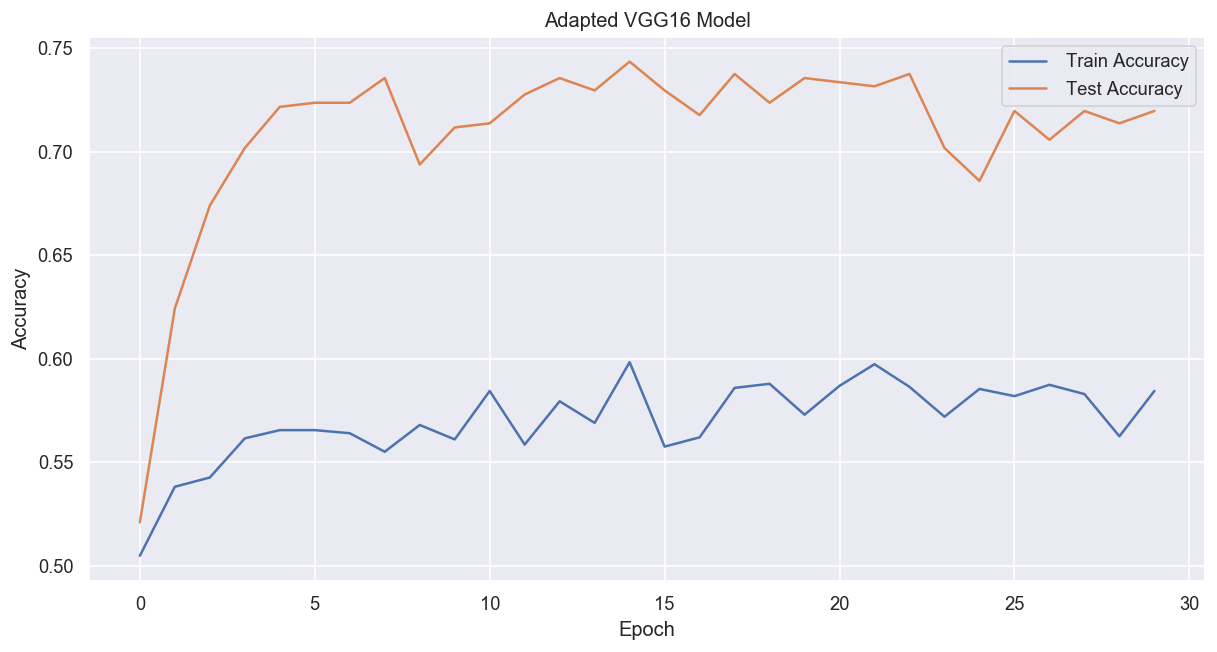

In [54]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(vgg16_adapted_2.history.history['accuracy'], label=' Train Accuracy')
plt.plot(vgg16_adapted_2.history.history['val_accuracy'],label=' Test Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Adapted VGG16 Model")
plt.legend()
plt.show()

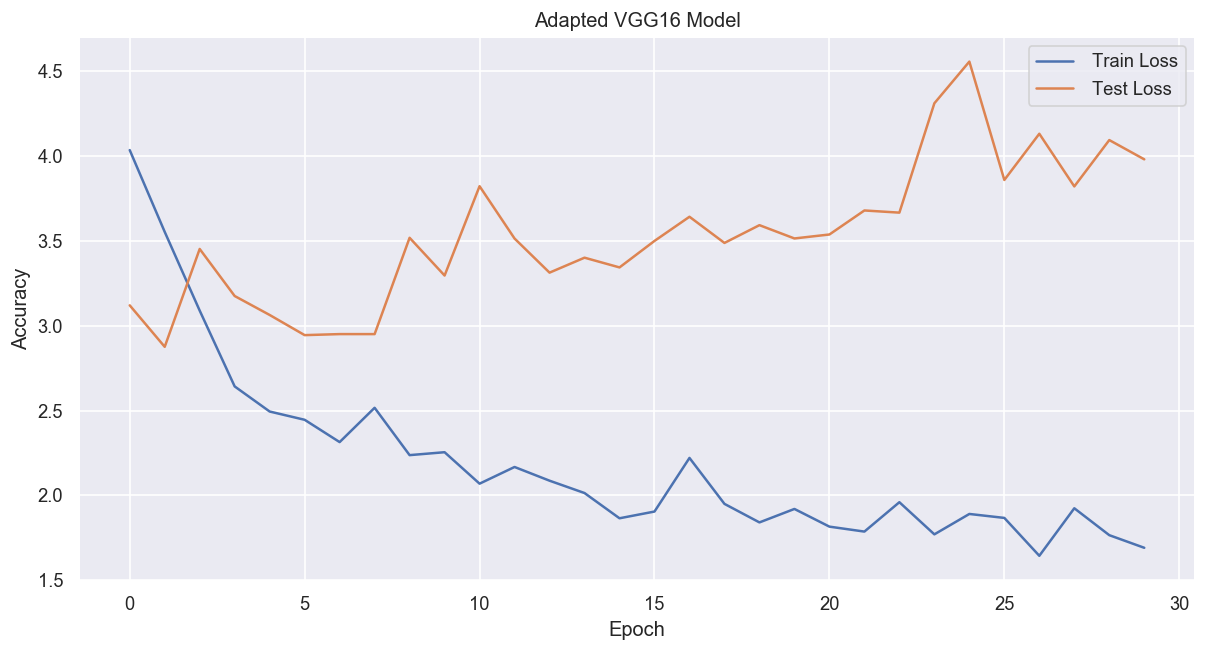

In [55]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(vgg16_adapted_2.history.history['loss'], label=' Train Loss')
plt.plot(vgg16_adapted_2.history.history['val_loss'],label=' Test Loss')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Adapted VGG16 Model")
plt.legend()
plt.show()

In [58]:
vgg16_adapted_score_2 = vgg16_adapted_2.evaluate(X_test, y_test, verbose=1)

503/503 [==============================] - 20s 40ms/step


## What performance do you achieve on your test set and how does this compare to the performance you were originally able to achieve with the linear methods?

In [64]:
print("Test Score Without The Drop Out",vgg16_adapted_score[1])
print("Test Score With The Drop Out",vgg16_adapted_score_2[1])

Test Score Without The Drop Out 0.7335984110832214
Test Score With The Drop Out 0.7196819186210632


We can see that the test score didn't improve. However, we can see from the loss function graph that both the training and the test are following a similar decreasing trend– which suggests that that second model is overfitting less. 

## 3. Comparison



Write a short comparison of the two methods, and provide a brief argument of which method you feel is superior, and why.



1. SVM's main goal is to form a hyperplane in the nth dimensional space to classify the data points, into two categories in this case, using support vectors. These support vectors are datapoints that are close to the hyperplane, and they help the algorithm find the position of the hyperplane that can achieves the maximum speration between the points on each side and the hyperplane. The different functions used here are linear, poly, abd rbfs. The first one is a linear seperation of the two categories, wheae the other two are non-linear seperations using the Kernel trick.
2. The VGG neural network is a deep convolutional network. The model architecture consists of 16 weight layers, 13 of these laters are convolutional with filter size of 3 x 3. All convolutional layers are divided into 5 groups and each group is followed by a max-pooling layer. 


The neural network scores on the test dataset are 71% and 73% which is relatively close to the test score using the RBF-kernel SVM with a test score of 69%. I think it is a tradeoff between achieving high accuracy and ease in the implementation. While both approaches have a similar performance score on the test dataset, the SVM approach can be applied directly to the data after pre-processing it. For instance, to train the SVM, I had to do the usual data pre-processing to fit the model without considering how the number of features in the data would affect the architecture/the parameters of the SVM. This is the result of the nature of SVM; they use a set of data points with assigned weights. On the other hand, the deep neural network approach relies on the number of features of the data as a measure of the number of hidden layers in the neural network. Thus, the scale and the architecture of the model have to be pre-determined, not as direct as in the SVM. While I didn't have to program the architecture from scratch, as I used the VGG neural network, the architecture of the networks depends largely on the data features. 